In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from matplotlib.lines import Line2D

In [ ]:
# import the data
df = pd.read_excel("C:/Users/myWan/Desktop/HDS Optional Enrolments Anonymised.xlsx", sheet_name="Export")

# retain colomns needed
df = df[['Student ID Pseudonymised', 'Long Course Title']]

# one-hot encoding
student_course_matrix = pd.crosstab(df['Student ID Pseudonymised'], df['Long Course Title'])

# check the data
print(student_course_matrix.shape)
student_course_matrix.head()


(323, 11)


Long Course Title,Applied Epidemiology,Decision Support Systems,Design and Analysis of Randomised Controlled Trials,Digital Transformation Project,Introduction to Clinical Bioinformatics,Introduction to Health Informatics,Machine Learning and Advanced Data Methods,Mathematical Computing for Medical Imaging,Multi-omics for Healthcare,Principles of Digital Biology,Tutorials in Advanced Statistics
Student ID Pseudonymised,,,,,,,,,,,
8362793,0,0,1,0,0,0,0,0,0,1,0
9735402,0,0,0,0,0,0,1,1,1,1,0
10358821,0,0,1,0,0,0,1,0,1,0,1
10368139,0,0,1,0,0,1,1,0,0,1,0
10529024,0,0,1,0,0,0,1,1,0,0,1


In [ ]:
# course category casting
course_category = {
    'Machine Learning and Advanced Data Methods': 'AI',
    'Digital Transformation Project': 'Informatics',
    'Introduction to Health Informatics': 'Informatics',
    'Introduction to Clinical Bioinformatics':'Informatics',
    'Tutorials in Advanced Statistics': 'Statistics',
    'Decision Support Systems':'Informatics',
    'Mathematical Computing for Medical Imaging':'AI',
    'Multi-omics for Healthcare':'Informatics',
    'Design and Analysis of Randomised Controlled Trials':'Statistics',
    'Principles of Digital Biology':'Informatics',
    'Applied Epidemiology':'Informatics'
}
# category feature
for cat in set(course_category.values()):
    student_course_matrix[cat] = 0

for course in student_course_matrix.columns:
    category = course_category.get(course)
    if category:
        student_course_matrix[category] += student_course_matrix[course]


# normalisation
features_to_scale = ['AI', 'Informatics', 'Statistics']
scaler = StandardScaler()
student_course_matrix[features_to_scale] = scaler.fit_transform(student_course_matrix[features_to_scale])

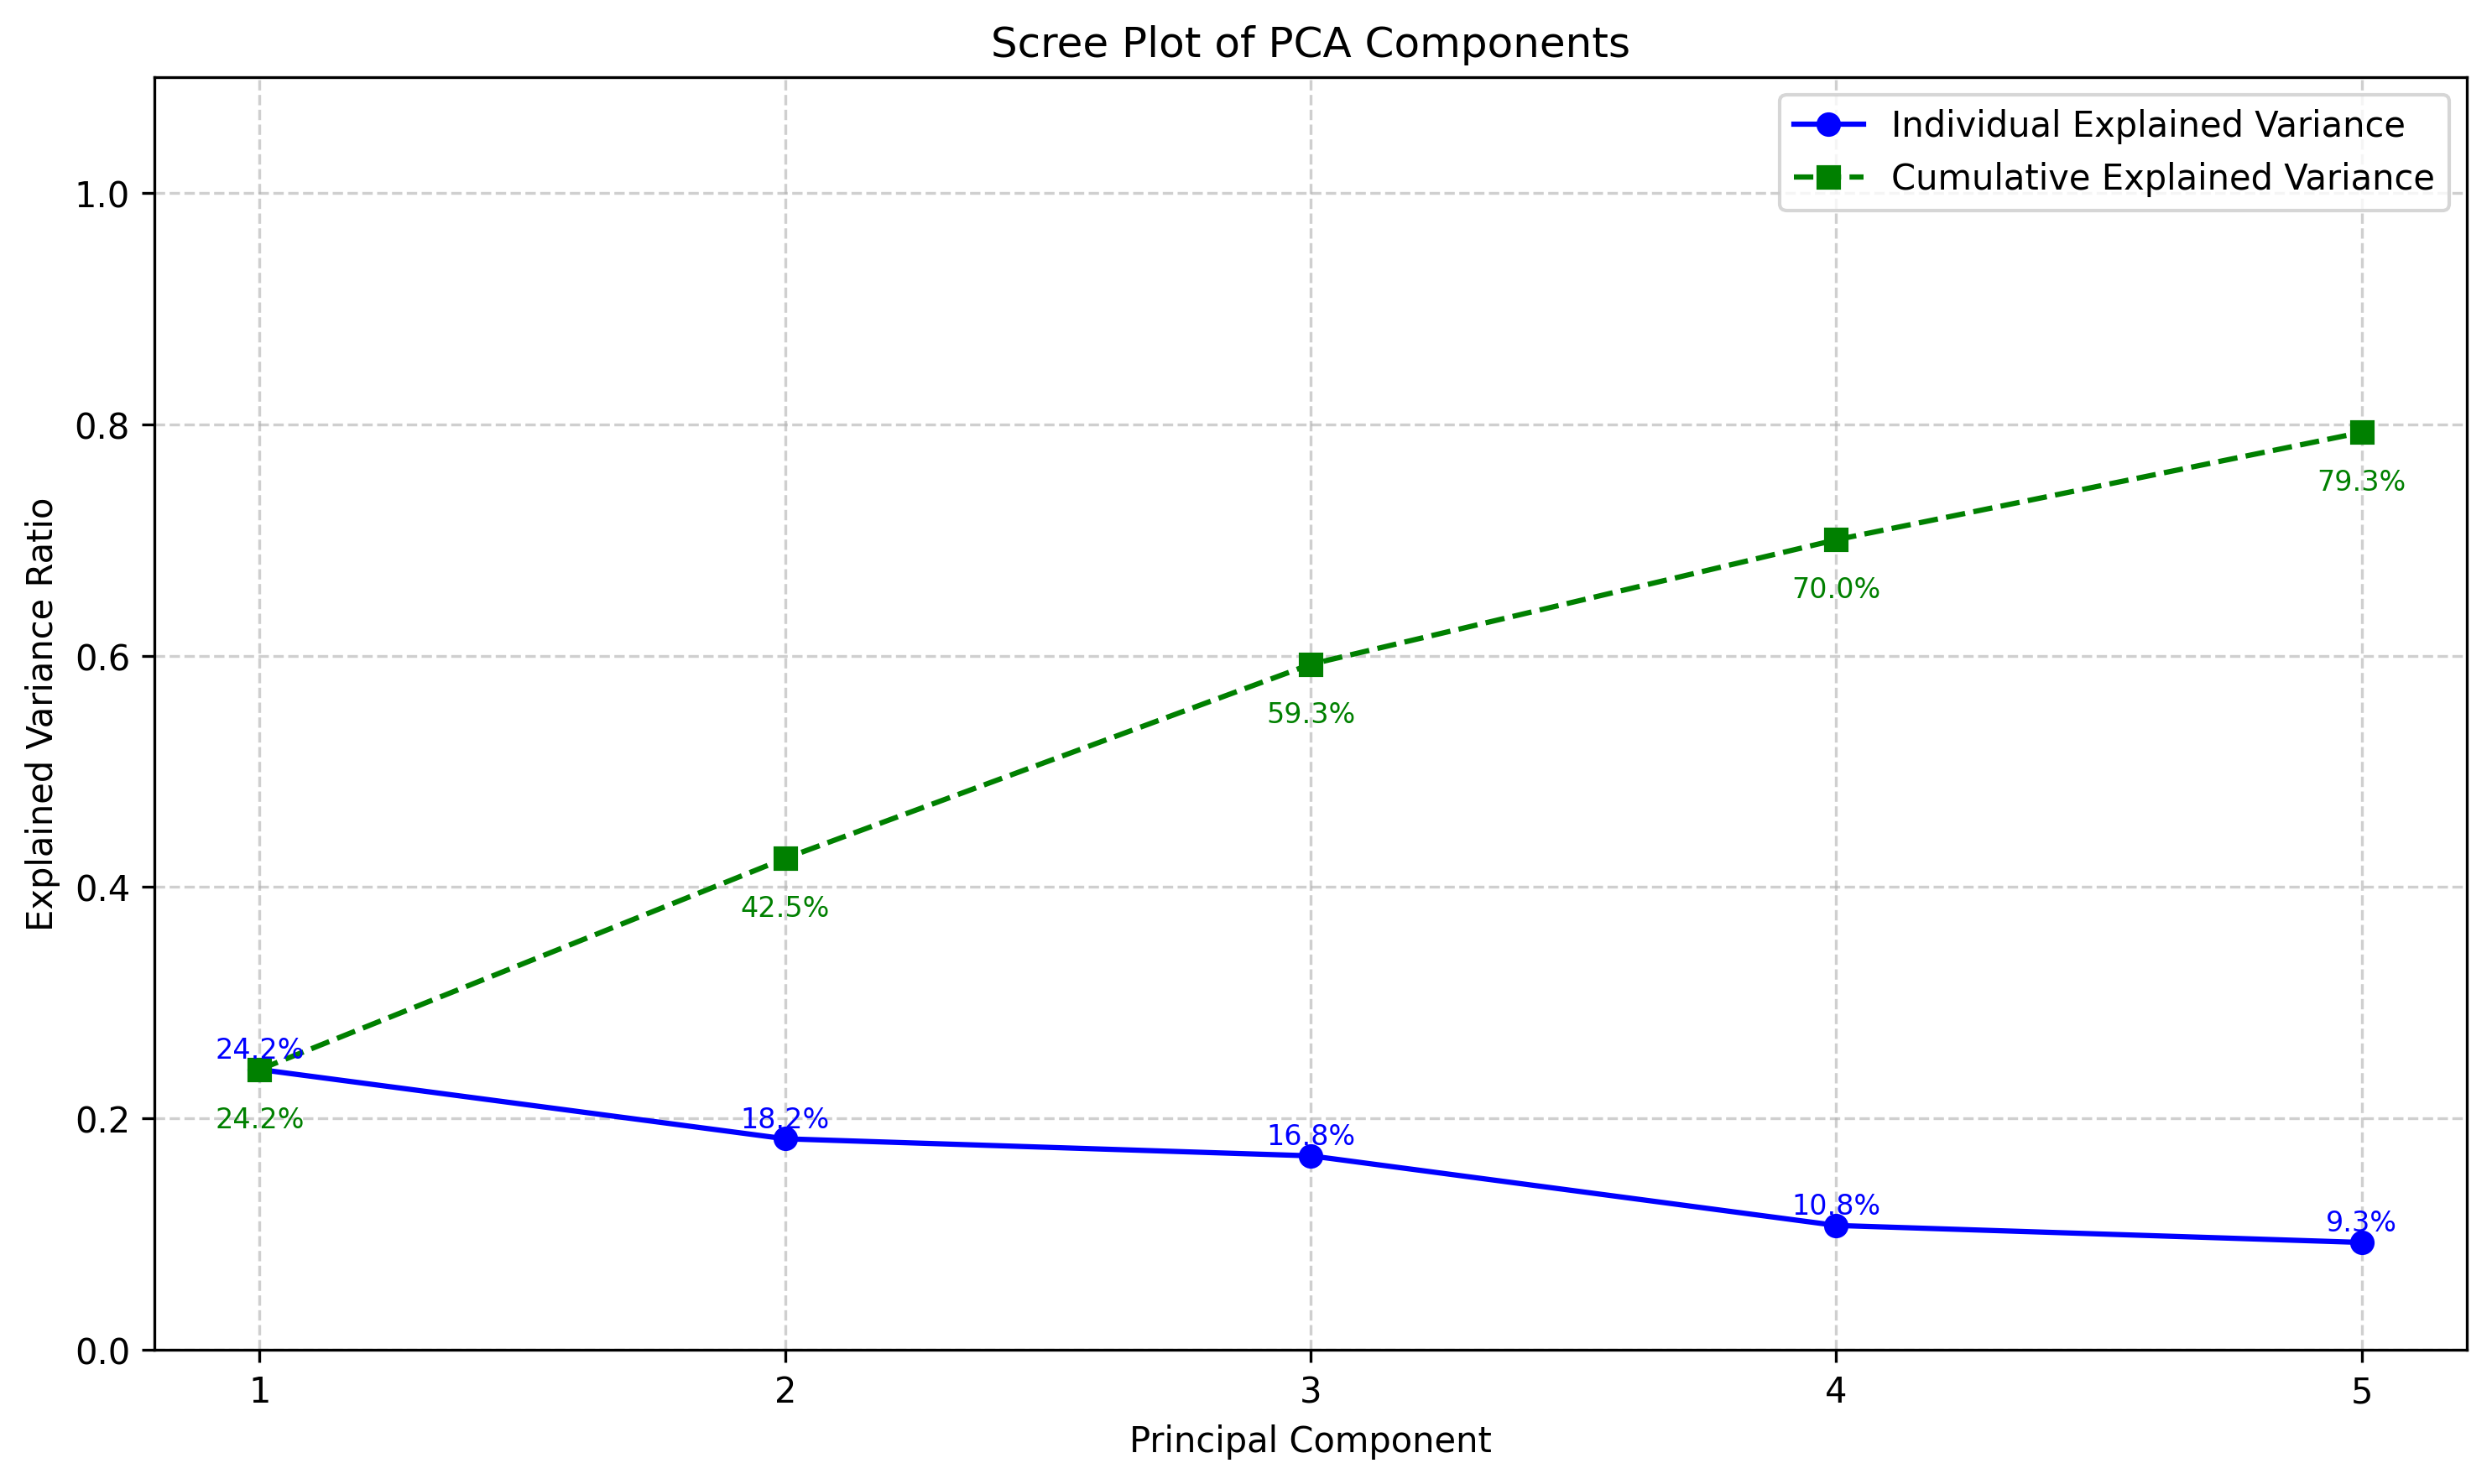

In [ ]:
# PCA process
X_courses = student_course_matrix.drop(features_to_scale, axis=1)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_courses)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
components = np.arange(1, len(explained_variance_ratio) + 1)

plt.figure(figsize=(10, 6), dpi=300) 
# variance for each PC
plt.plot(components, explained_variance_ratio, 'o-', label='Individual Explained Variance', color='blue')
for i, v in enumerate(explained_variance_ratio):
    plt.text(i + 1, v + 0.01, f"{v*100:.1f}%", ha='center', fontsize=8, color='blue')

# accumulated variance
plt.plot(components, cumulative_variance, 's--', label='Cumulative Explained Variance', color='green')
for i, v in enumerate(cumulative_variance):
    plt.text(i + 1, v - 0.05, f"{v*100:.1f}%", ha='center', fontsize=8, color='green')

plt.title('Scree Plot of PCA Components', fontsize=12)
plt.xlabel('Principal Component', fontsize=10)
plt.ylabel('Explained Variance Ratio', fontsize=10)
plt.xticks(components)
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()


plt.tight_layout()
plt.savefig("scree_plot.png", dpi=300)  
plt.show()


DBSCAN Evaluation:
Silhouette Score: 0.6064293687141455
Calinski-Harabasz: 46.776653934007754
Davies-Bouldin: 0.960257986024845


c:\Users\myWan\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\myWan\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\myWan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\myWan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\myWan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _exe


KMeans (k=2) Evaluation:
Silhouette Score: 0.2376009851612788
Calinski-Harabasz: 95.10669021098033
Davies-Bouldin: 1.7671049252954487

Spectral Clustering (k=2) Evaluation:
Silhouette Score: 0.17160697253219245
Calinski-Harabasz: 55.01928603139411
Davies-Bouldin: 2.310495731699063

KMeans (k=3) Evaluation:
Silhouette Score: 0.24795555050256626
Calinski-Harabasz: 89.96873178199817
Davies-Bouldin: 1.5732576042828714

Spectral Clustering (k=3) Evaluation:
Silhouette Score: 0.11684135697411392
Calinski-Harabasz: 40.13216122898177
Davies-Bouldin: 2.0672098904551257

KMeans (k=4) Evaluation:
Silhouette Score: 0.2843047709428494
Calinski-Harabasz: 88.12338653040469
Davies-Bouldin: 1.3780620898031322

Spectral Clustering (k=4) Evaluation:
Silhouette Score: 0.12277842357054511
Calinski-Harabasz: 35.43267476316306
Davies-Bouldin: 1.9116811317491083

KMeans_k=2 Cluster Summary:
Cluster 0 - 124 students:
Long Course Title
AI             0.804641
Informatics   -0.878689
Statistics     0.486733
dty

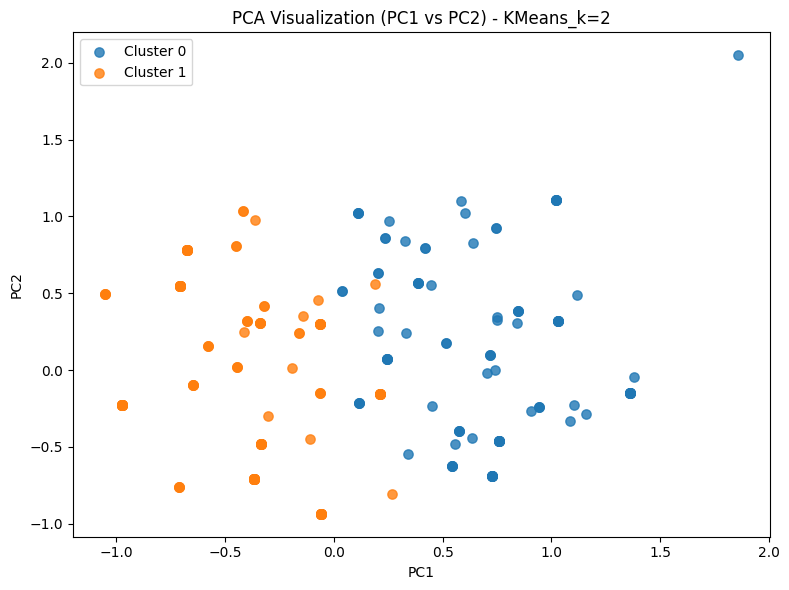

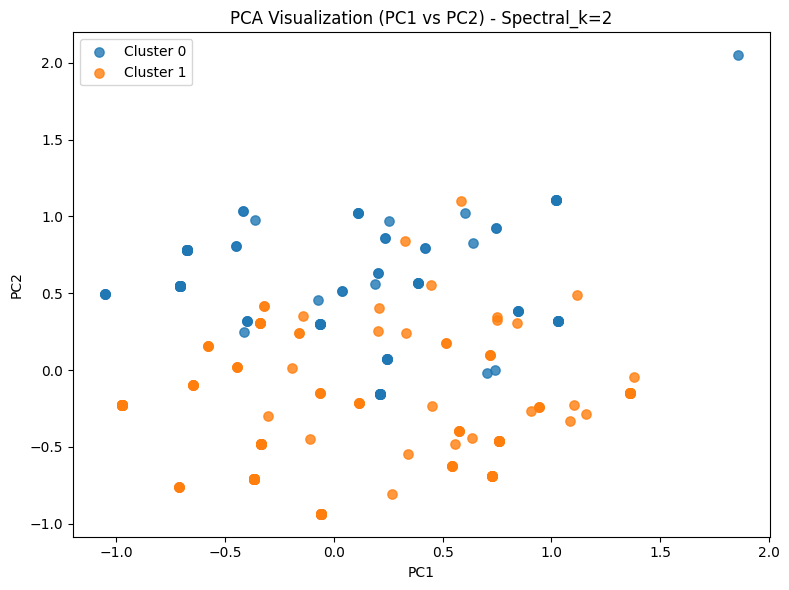

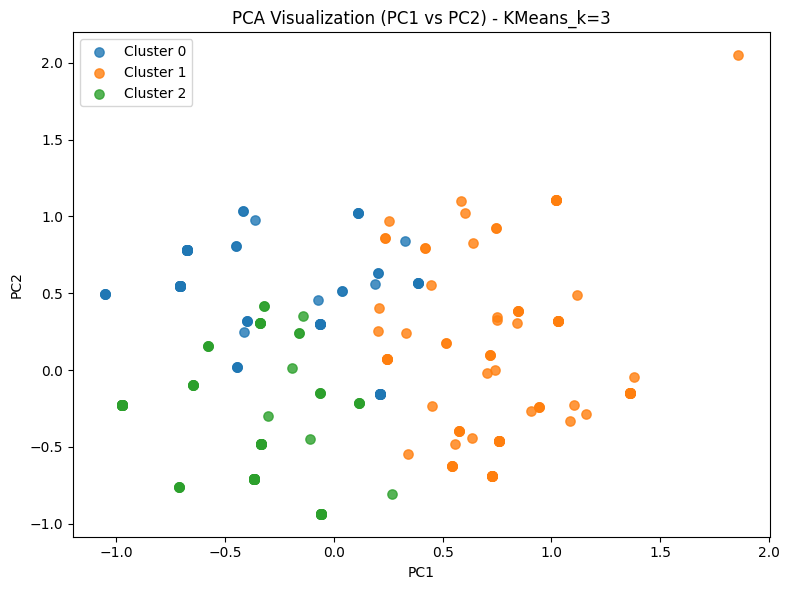

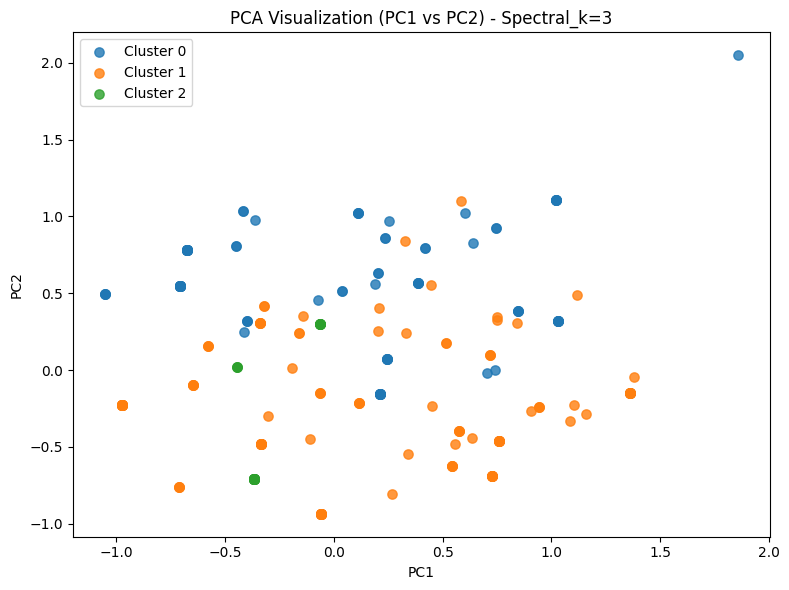

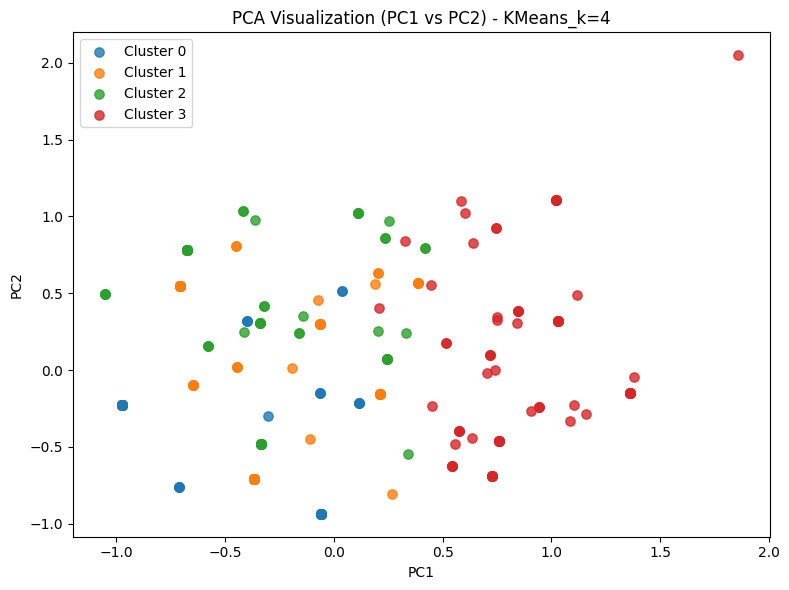

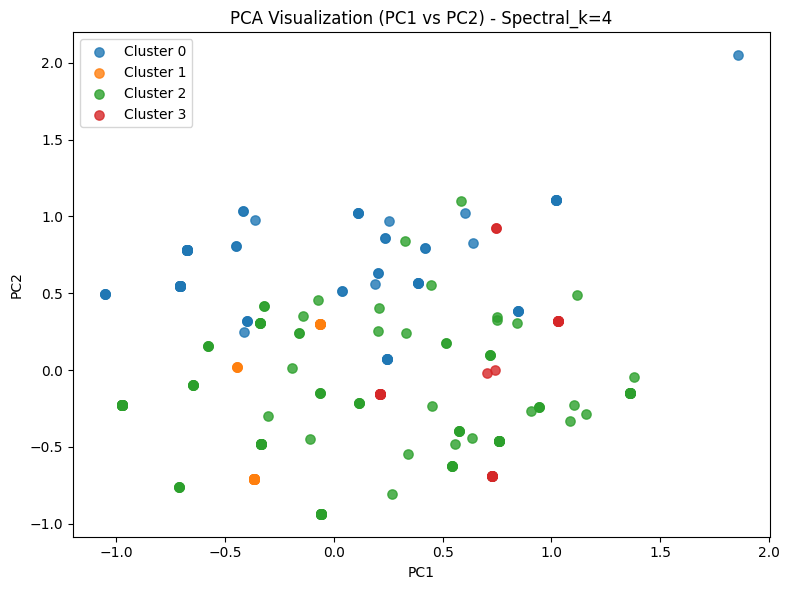

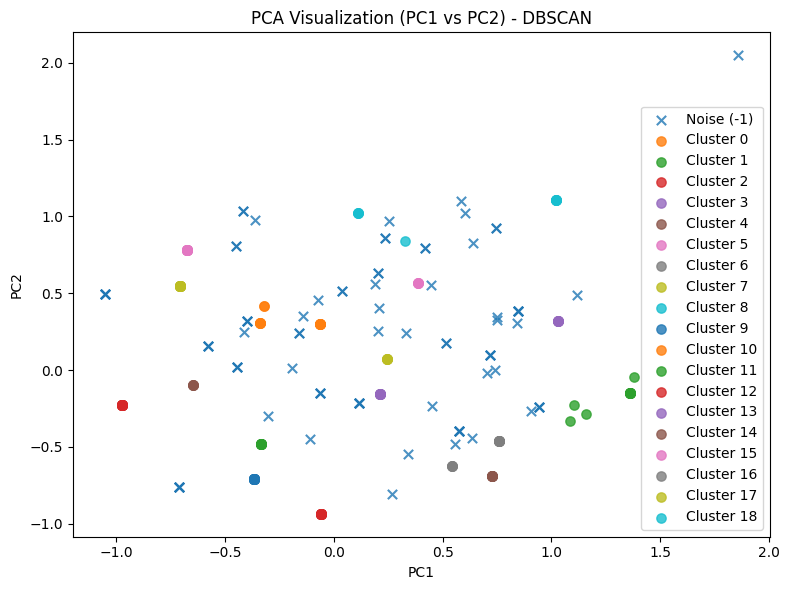

In [ ]:
# Clustering
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)
student_course_matrix['DBSCAN'] = dbscan_labels

# evaluation function
def evaluate_clustering(name, labels, X):
    if name == 'DBSCAN' and (len(set(labels)) <= 1 or (len(set(labels)) == 2 and -1 in labels)):
        print(f"{name} Result is invalid")
        return
    print(f"\n{name} Evaluation:")
    print("Silhouette Score:", silhouette_score(X, labels))
    print("Calinski-Harabasz:", calinski_harabasz_score(X, labels))
    print("Davies-Bouldin:", davies_bouldin_score(X, labels))

# DBSCAN evaluation
evaluate_clustering("DBSCAN", dbscan_labels, X_pca)

# different k
cluster_results = {}
k_values = [2, 3, 4]

for k in k_values:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_pca)
    col_kmeans = f'KMeans_k={k}'
    student_course_matrix[col_kmeans] = kmeans_labels
    cluster_results[col_kmeans] = kmeans_labels
    evaluate_clustering(f'KMeans (k={k})', kmeans_labels, X_pca)

    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
    spectral_labels = spectral.fit_predict(X_courses)
    col_spectral = f'Spectral_k={k}'
    student_course_matrix[col_spectral] = spectral_labels
    cluster_results[col_spectral] = spectral_labels
    evaluate_clustering(f'Spectral Clustering (k={k})', spectral_labels, X_courses)

# cluster interpretation
for name, labels in cluster_results.items():
    print(f"\n{name} Cluster Summary:")
    for cluster_id in sorted(set(labels)):
        group = student_course_matrix[student_course_matrix[name] == cluster_id]
        print(f"Cluster {cluster_id} - {len(group)} students:")
        print(group[features_to_scale].mean())

# visualisation

def plot_clusters_discrete(X2d, labels, title):
    labels = np.asarray(labels)
    uniq = sorted(np.unique(labels))

    plt.figure(figsize=(8, 6))

    for i, cid in enumerate(uniq):
        mask = (labels == cid)
        if cid == -1:
            # DBSCAN noise
            plt.scatter(X2d[mask, 0], X2d[mask, 1],
                        s=45, marker='x', alpha=0.8, label='Noise (-1)')
        else:
            plt.scatter(X2d[mask, 0], X2d[mask, 1],
                        s=45, alpha=0.8, label=f'Cluster {cid}')

    plt.title(title)
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend(loc='best', frameon=True)
    plt.tight_layout()
    plt.show()

X_pca_2d = X_pca[:, :2]

for name, labels in cluster_results.items():
    plot_clusters_discrete(X_pca_2d, labels, f"PCA Visualization (PC1 vs PC2) - {name}")

plot_clusters_discrete(X_pca_2d, dbscan_labels, "PCA Visualization (PC1 vs PC2) - DBSCAN")


Recommended Timetable Allocation (Greedy Coloring):
Tutorials in Advanced Statistics: Time Slot 0
Digital Transformation Project: Time Slot 1
Machine Learning and Advanced Data Methods: Time Slot 2
Introduction to Health Informatics: Time Slot 3
Decision Support Systems: Time Slot 4
Mathematical Computing for Medical Imaging: Time Slot 5
Design and Analysis of Randomised Controlled Trials: Time Slot 6
Principles of Digital Biology: Time Slot 7
Introduction to Clinical Bioinformatics: Time Slot 6

Recommended Timetable Allocation (Greedy Coloring):
Tutorials in Advanced Statistics: Time Slot 0
Digital Transformation Project: Time Slot 1
Machine Learning and Advanced Data Methods: Time Slot 2
Decision Support Systems: Time Slot 3
Principles of Digital Biology: Time Slot 4
Mathematical Computing for Medical Imaging: Time Slot 5
Design and Analysis of Randomised Controlled Trials: Time Slot 6
Introduction to Health Informatics: Time Slot 5
Introduction to Clinical Bioinformatics: Time Slo

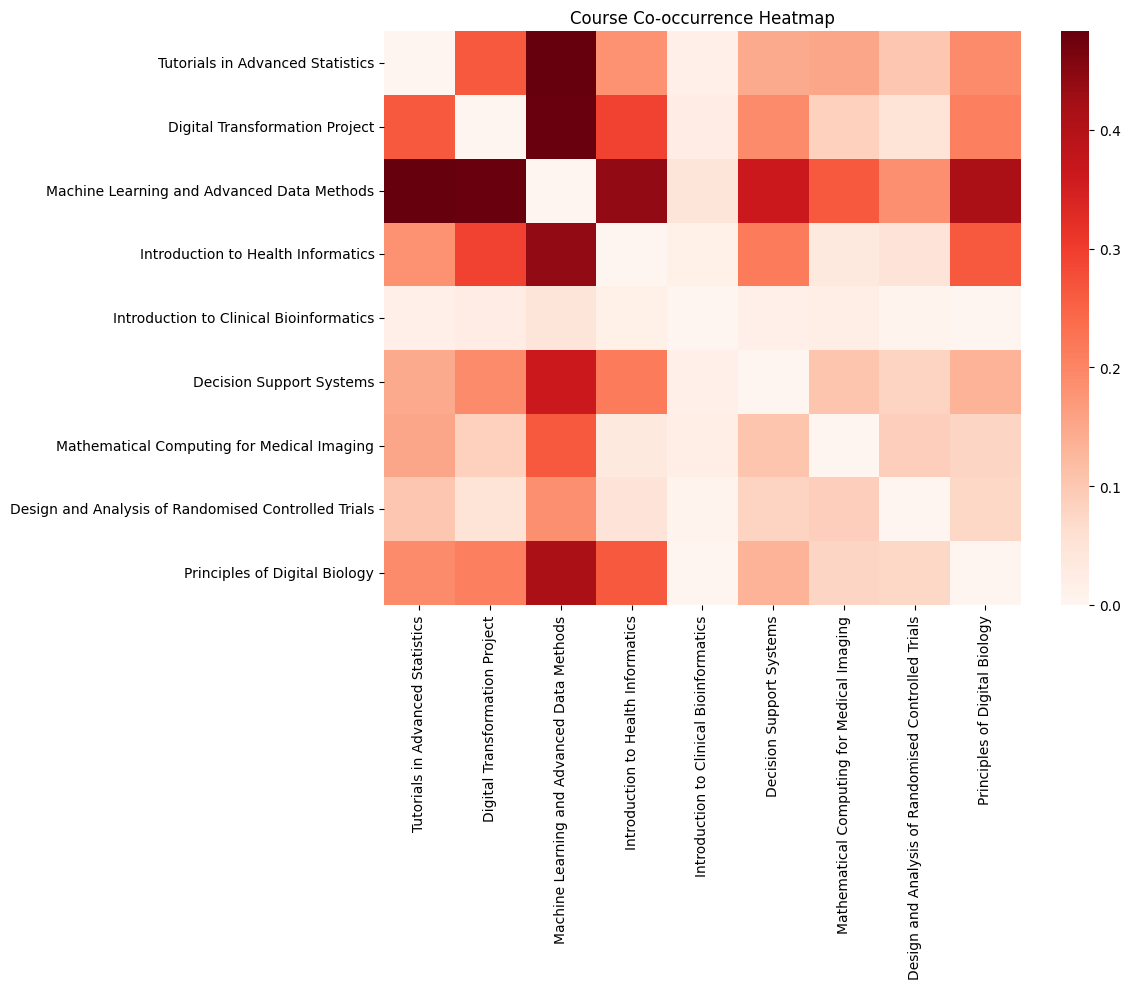

In [ ]:
# Timetable Opitimisation
# delete Applied Epidemiology 
df = df[df['Long Course Title'] != 'Applied Epidemiology']
df = df[df['Long Course Title'] != 'Multi-omics for Healthcare']
# course cooccurrence matrix
students = df['Student ID Pseudonymised'].unique()
courses = df['Long Course Title'].unique()
co_matrix = pd.DataFrame(0, index=courses, columns=courses)

for student in students:
    selected_courses = df[df['Student ID Pseudonymised'] == student]['Long Course Title'].unique()
    for i in range(len(selected_courses)):
        for j in range(i + 1, len(selected_courses)):
            co_matrix.loc[selected_courses[i], selected_courses[j]] += 1
            co_matrix.loc[selected_courses[j], selected_courses[i]] += 1

co_matrix_normalized = co_matrix / len(students)
thresholds = [0.01, 0.05, 0.1]
for threshold in thresholds:
# course conflict graph
    G = nx.Graph()
    for course in courses:
        G.add_node(course)

    for i in courses:
        for j in courses:
            if i != j and co_matrix_normalized.loc[i, j] > threshold:
                G.add_edge(i, j, weight=co_matrix_normalized.loc[i, j])

# graph colouring
    coloring = nx.coloring.greedy_color(G, strategy='largest_first')
    print("\nRecommended Timetable Allocation (Greedy Coloring):")
    for course, slot in coloring.items():
        print(f"{course}: Time Slot {slot}")

# low-conflict course pairs
co_matrix_long = co_matrix_normalized.stack().reset_index()
co_matrix_long.columns = ['Course1', 'Course2', 'Co_Occurrence']
co_matrix_long = co_matrix_long[co_matrix_long['Course1'] != co_matrix_long['Course2']]
co_matrix_long['Pair'] = co_matrix_long.apply(lambda row: tuple(sorted([row['Course1'], row['Course2']])), axis=1)
co_matrix_long = co_matrix_long.drop_duplicates(subset=['Pair'])

# 10 lowest
lowest_pairs = co_matrix_long.sort_values(by='Co_Occurrence').head(10)
print("\nSuggested course pairs that can be allowed to clash (lowest conflict pairs):")
for idx, row in lowest_pairs.iterrows():
    print(f"{row['Course1']} & {row['Course2']}: Co-occurrence rate = {row['Co_Occurrence']*100:.2f}%")

# conflict heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_matrix_normalized, cmap='Reds', xticklabels=True, yticklabels=True)
plt.title("Course Co-occurrence Heatmap")
plt.tight_layout()
plt.show()
